# **Decision tree classification with UCI Poker Hand Dataset and Scikit-learn**
**Student Name: Châu Tấn Kiệt**\
**Class: 21CLC04**\
**Student ID: 21127329**


In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Preparing the dataset**

In [5]:
base_path = '/content/drive/MyDrive/Artificial Intelligence/Lab 2'
# Merging 2 files 
#train_csv = pd.read_csv(f'{base_path}/poker-hand-training-true.data', names=list(range(11)))
#test_csv = pd.read_csv(f'{base_path}/poker-hand-testing.data', names=list(range(11)))
#merged_csv = pd.concat([train_csv, test_csv], axis=0)
#merged_csv.to_csv(f'{base_path}/poker-hand-data.csv', index=False)

datasets = pd.read_csv(f'{base_path}/poker-hand-data.csv')
datasets = datasets.to_numpy()

label = datasets[:, -1]       # Last column
datasets = datasets[:, :-1]   # All except last column

**Preparing subsets with different proportions** \
There are 4 subsets with proportion of train/test of 40/60, 60/40, 80/20 and 90/10

In [6]:
subsets = []
subsets.append(train_test_split(datasets, label, train_size=0.4, stratify=label, shuffle=True, random_state=0))
subsets.append(train_test_split(datasets, label, train_size=0.6, stratify=label, shuffle=True, random_state=0))
subsets.append(train_test_split(datasets, label, train_size=0.8, stratify=label, shuffle=True, random_state=0))
subsets.append(train_test_split(datasets, label, train_size=0.9, stratify=label, shuffle=True, random_state=0))

**Datasets distribution visualization**

In [7]:
import matplotlib.pyplot as pyplot
feature_names = ["S1", "C1", "S2", "C2", "S3", "C3", "S4", "C4", "S5", "C5"] 
class_names= ["Nothing", "One Pair", "Two Pairs", "Three Of A Kind", "Straight", "Flush", "Full House", "Four Of A Kind", "Straight Flush", "Royal Flush"]

def drawDistribution(original, train, test, title):
  countOrigin = pd.DataFrame(original).value_counts()
  countTrain = pd.DataFrame(train).value_counts()
  countTest = pd.DataFrame(test).value_counts()
  df = pd.DataFrame({'original': countOrigin, 'train': countTrain, 'test': countTest})
  ax = df.plot(kind='bar', xlabel="Classes", ylabel="Count", title=title, color=['#00a520','#2554c7','#c11d17'])
  ax.set_xticklabels(class_names, rotation='vertical')
  ax.bar_label(ax.containers[0])
  pyplot.show()






**40/60 Dataset Distribution**

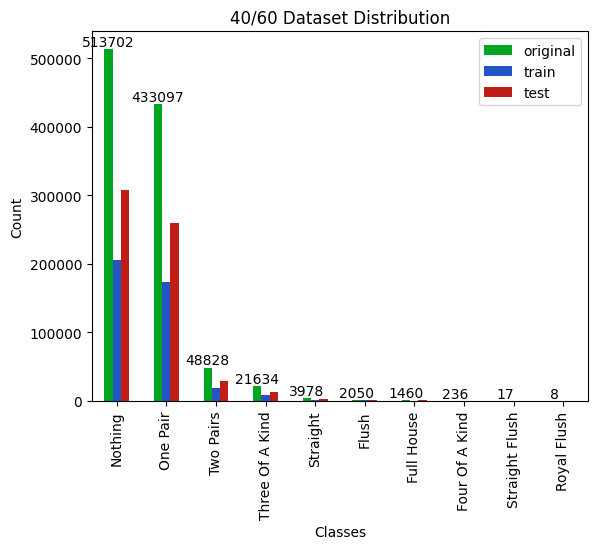

In [8]:
drawDistribution(label, subsets[0][2], subsets[0][3], '40/60 Dataset Distribution')

**60/40 Dataset Distribution**


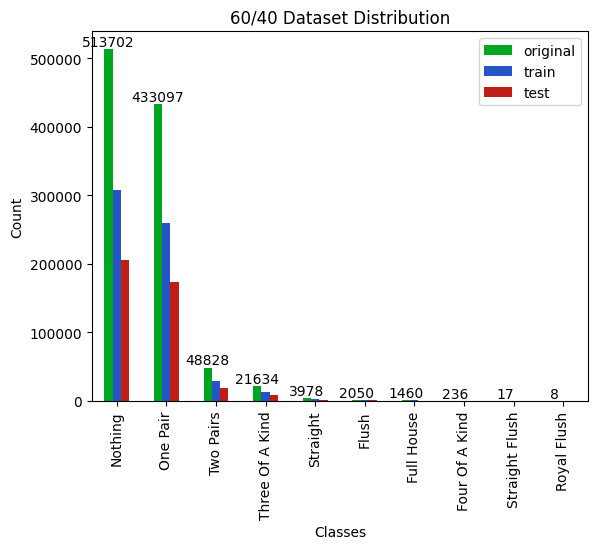

In [9]:
drawDistribution(label, subsets[1][2], subsets[1][3], '60/40 Dataset Distribution')



**80/20 Dataset Distribution**


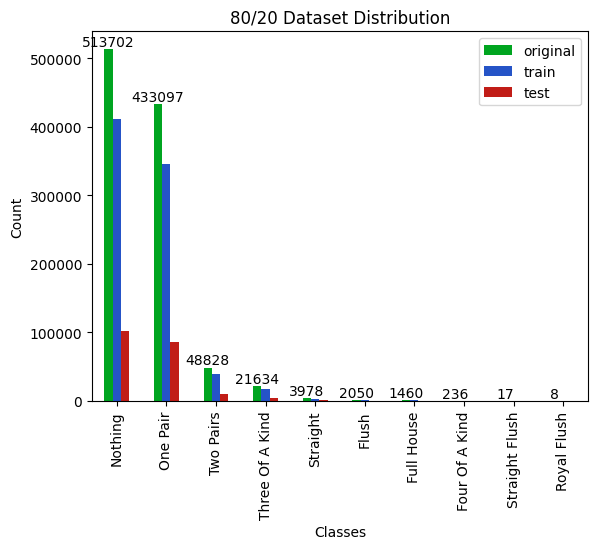

In [10]:
drawDistribution(label, subsets[2][2], subsets[2][3], '80/20 Dataset Distribution')

**90/10 Dataset Distribution**


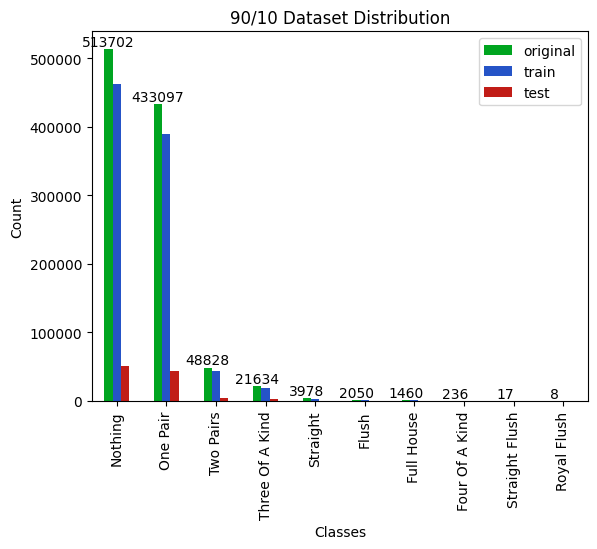

In [11]:
drawDistribution(label, subsets[3][2], subsets[3][3], '90/10 Dataset Distribution')

## **Building the decision tree classifiers**




In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz 
decision_trees = [None] * 4

### **For 40/60 set**


In [13]:
feature_train, feature_test, label_train, label_test = subsets[0]
decision_trees[0] = DecisionTreeClassifier(criterion='log_loss', random_state=0) # With log_loss <-> Information Gain
decision_trees[0].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

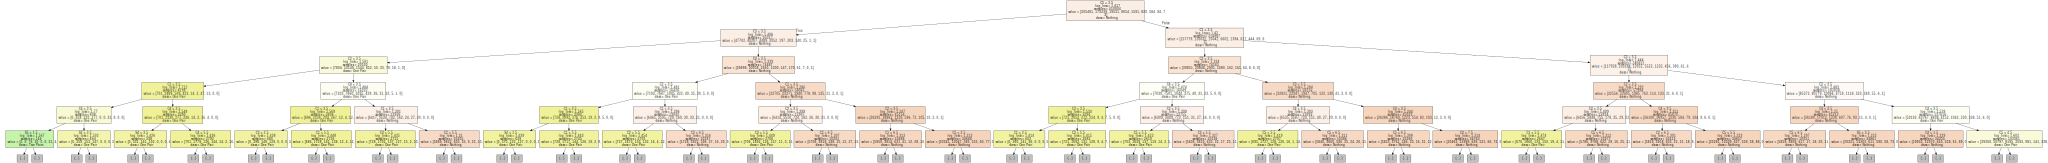

In [14]:
dot_data = tree.export_graphviz(decision_trees[0], out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                max_depth=5,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### **For 60/40 set**


In [15]:
feature_train, feature_test, label_train, label_test = subsets[1]
decision_trees[1] = DecisionTreeClassifier(criterion='log_loss', random_state=0) # With log_loss <-> Information Gain
decision_trees[1].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

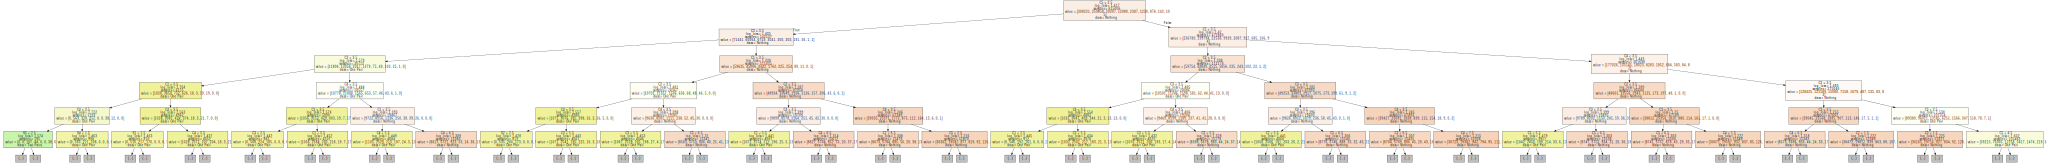

In [16]:
dot_data = tree.export_graphviz(decision_trees[1], out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                max_depth=5,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### **For 80/20 set**

In [17]:
feature_train, feature_test, label_train, label_test = subsets[2]
decision_trees[2] = DecisionTreeClassifier(criterion='log_loss', random_state=0) # With log_loss <-> Information Gain
decision_trees[2].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

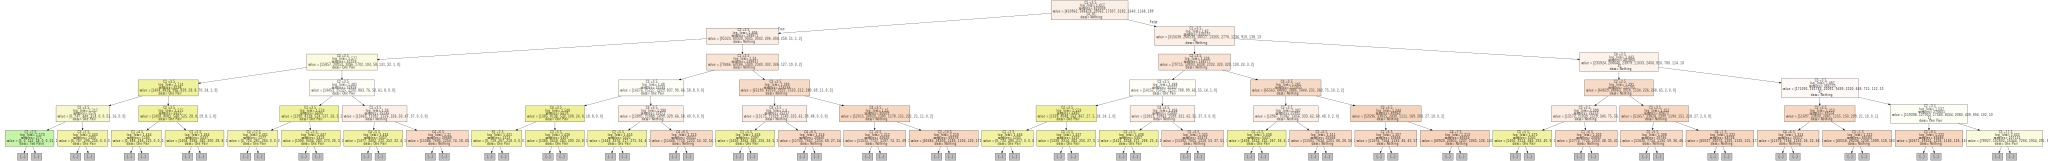

In [18]:
dot_data = tree.export_graphviz(decision_trees[2], out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                max_depth=5,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### **For 90/10 set**

In [19]:
feature_train, feature_test, label_train, label_test = subsets[3]
decision_trees[3] = DecisionTreeClassifier(criterion='log_loss', random_state=0) # With log_loss <-> Information Gain
decision_trees[3].fit(feature_train, label_train.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

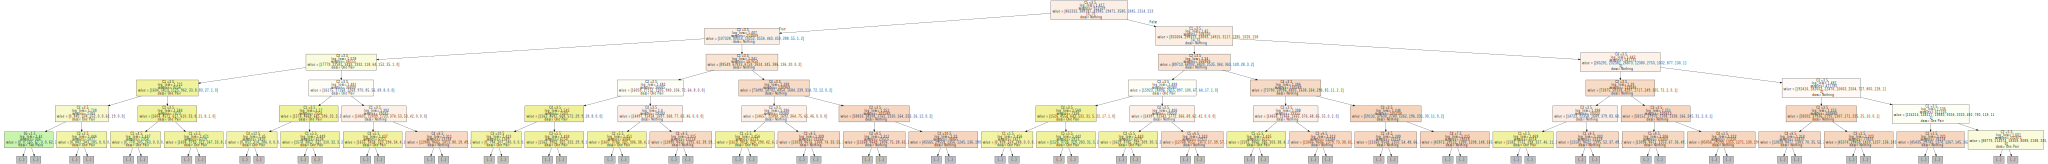

In [20]:
dot_data = tree.export_graphviz(decision_trees[3], out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                max_depth=5,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## **Evaluating the decision tree classifiers**

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### **For 40/60 set**

**Prediction**

In [22]:
feature_test_40 = subsets[0][1]
label_test_40 = subsets[0][3]
label_pred_40 = decision_trees[0].predict(feature_test_40)

**Classification Report**

In [23]:
print(classification_report(label_test_40, label_pred_40, target_names=class_names))

                 precision    recall  f1-score   support

        Nothing       0.71      0.70      0.70    308221
       One Pair       0.58      0.58      0.58    259858
      Two Pairs       0.27      0.29      0.28     29297
Three Of A Kind       0.28      0.31      0.30     12980
       Straight       0.22      0.26      0.24      2387
          Flush       0.06      0.10      0.07      1230
     Full House       0.10      0.12      0.11       876
 Four Of A Kind       0.13      0.16      0.14       142
 Straight Flush       0.00      0.00      0.00        10
    Royal Flush       0.00      0.00      0.00         5

       accuracy                           0.62    615006
      macro avg       0.23      0.25      0.24    615006
   weighted avg       0.62      0.62      0.62    615006



**Confusion Matrix**

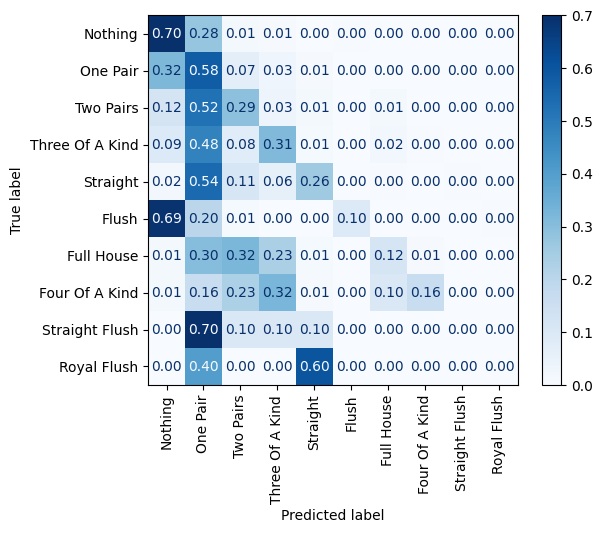

In [25]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_40, label_pred_40, 
                                        display_labels=class_names,
                                        xticks_rotation='vertical',
                                        values_format='.2f',
                                        normalize='true',
                                        cmap='Blues')

### **For 60/40 set**

**Prediction**

In [26]:
feature_test_60 = subsets[1][1]
label_test_60 = subsets[1][3]
label_pred_60 = decision_trees[1].predict(feature_test_60)

**Classification Report**

In [27]:
print(classification_report(label_test_60, label_pred_60, target_names=class_names, zero_division=0))

                 precision    recall  f1-score   support

        Nothing       0.72      0.72      0.72    205481
       One Pair       0.60      0.60      0.60    173239
      Two Pairs       0.29      0.31      0.30     19531
Three Of A Kind       0.33      0.37      0.35      8654
       Straight       0.25      0.28      0.26      1591
          Flush       0.06      0.09      0.07       820
     Full House       0.11      0.14      0.13       584
 Four Of A Kind       0.15      0.16      0.16        94
 Straight Flush       0.00      0.00      0.00         7
    Royal Flush       0.00      0.00      0.00         3

       accuracy                           0.63    410004
      macro avg       0.25      0.27      0.26    410004
   weighted avg       0.64      0.63      0.64    410004



**Confusion Matrix**

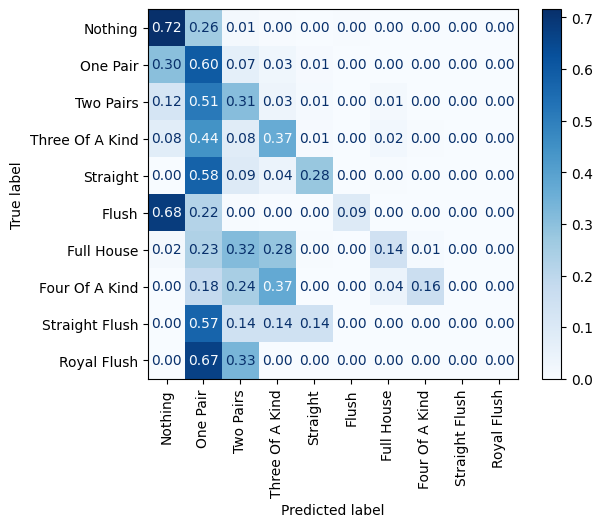

In [28]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_60, label_pred_60, 
                                        display_labels=class_names,
                                        xticks_rotation='vertical',
                                        values_format='.2f',
                                        normalize='true',
                                        cmap='Blues')

### **For 80/20 set**

**Prediction**

In [29]:
feature_test_80 = subsets[2][1]
label_test_80 = subsets[2][3]
label_pred_80 = decision_trees[2].predict(feature_test_80)

**Classification Report**

In [30]:
print(classification_report(label_test_80, label_pred_80, target_names=class_names, zero_division=0))

                 precision    recall  f1-score   support

        Nothing       0.73      0.72      0.73    102740
       One Pair       0.61      0.61      0.61     86619
      Two Pairs       0.31      0.33      0.32      9766
Three Of A Kind       0.36      0.39      0.38      4327
       Straight       0.27      0.31      0.29       796
          Flush       0.08      0.11      0.09       410
     Full House       0.15      0.16      0.15       292
 Four Of A Kind       0.13      0.19      0.16        47
 Straight Flush       0.00      0.00      0.00         3
    Royal Flush       0.00      0.00      0.00         2

       accuracy                           0.65    205002
      macro avg       0.26      0.28      0.27    205002
   weighted avg       0.65      0.65      0.65    205002



**Confusion Matrix**

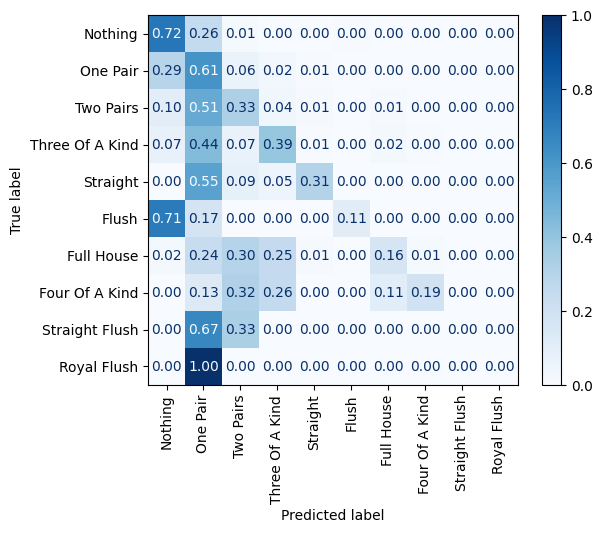

In [31]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_80, label_pred_80, 
                                        display_labels=class_names,
                                        xticks_rotation='vertical',
                                        values_format='.2f',
                                        normalize='true',
                                        cmap='Blues')

### **For 90/10 set**

**Prediction**

In [32]:
feature_test_90 = subsets[3][1]
label_test_90 = subsets[3][3]
label_pred_90 = decision_trees[3].predict(feature_test_90)

**Classification Report**

In [33]:
print(classification_report(label_test_90, label_pred_90, target_names=class_names, zero_division=0))

                 precision    recall  f1-score   support

        Nothing       0.74      0.73      0.74     51370
       One Pair       0.62      0.62      0.62     43310
      Two Pairs       0.32      0.34      0.33      4883
Three Of A Kind       0.37      0.41      0.39      2163
       Straight       0.30      0.32      0.31       398
          Flush       0.07      0.11      0.09       205
     Full House       0.14      0.18      0.16       146
 Four Of A Kind       0.09      0.13      0.11        23
 Straight Flush       0.00      0.00      0.00         2
    Royal Flush       0.00      0.00      0.00         1

       accuracy                           0.66    102501
      macro avg       0.27      0.28      0.27    102501
   weighted avg       0.66      0.66      0.66    102501



**Confusion Matrix**

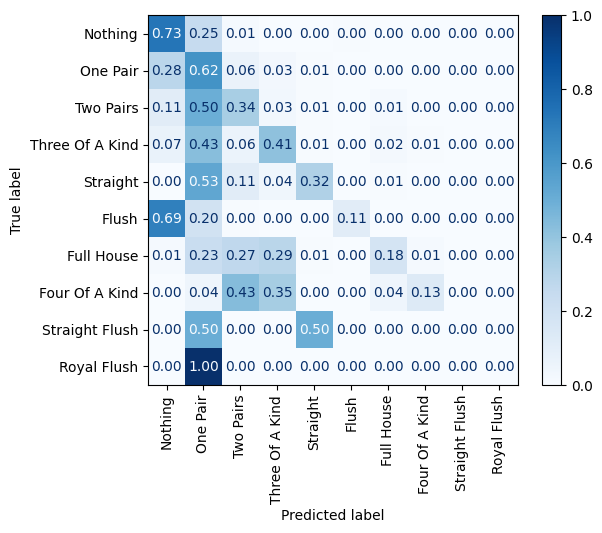

In [34]:
disp = ConfusionMatrixDisplay.from_predictions(label_test_90, label_pred_90, 
                                        display_labels=class_names,
                                        xticks_rotation='vertical',
                                        values_format='.2f',
                                        normalize='true',
                                        cmap='Blues')

## **Depth and accuracy of a decision tree**

In [35]:
from sklearn.metrics import accuracy_score
feature_train_80, feature_test_80, label_train_80, label_test_80 = subsets[2]

### **max_depth=None**

In [36]:
decision_tree_inf = DecisionTreeClassifier(criterion='log_loss', random_state=0)
decision_tree_inf.fit(feature_train_80, label_train_80.ravel())

DecisionTreeClassifier(criterion='log_loss', random_state=0)

**Tree**

In [37]:
dot_data = tree.export_graphviz(decision_tree_inf, out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                max_depth=10,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Accuracy Score**

In [38]:
label_pred_inf = decision_tree_inf.predict(feature_test_80)
accuracy_score(label_test_80, label_pred_inf)

0.6466327157783827

### **max_depth = 2**

In [39]:
decision_tree_2 = DecisionTreeClassifier(criterion='log_loss', random_state=0, max_depth=2)
decision_tree_2.fit(feature_train_80, label_train_80.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=0)

**Tree**

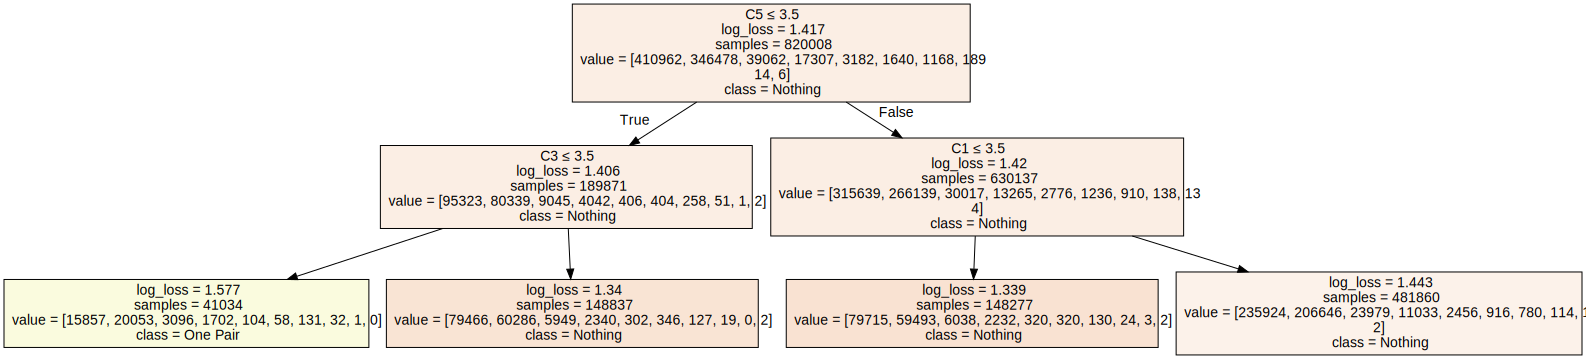

In [40]:
dot_data = tree.export_graphviz(decision_tree_2, out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Accuracy Score**

In [41]:
label_pred_2 = decision_tree_2.predict(feature_test_80)
accuracy_score(label_test_80, label_pred_2)

0.5059560394532736

### **max_depth = 3**

In [42]:
decision_tree_3 = DecisionTreeClassifier(criterion='log_loss', random_state=0, max_depth=3)
decision_tree_3.fit(feature_train_80, label_train_80.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=3, random_state=0)

**Tree**

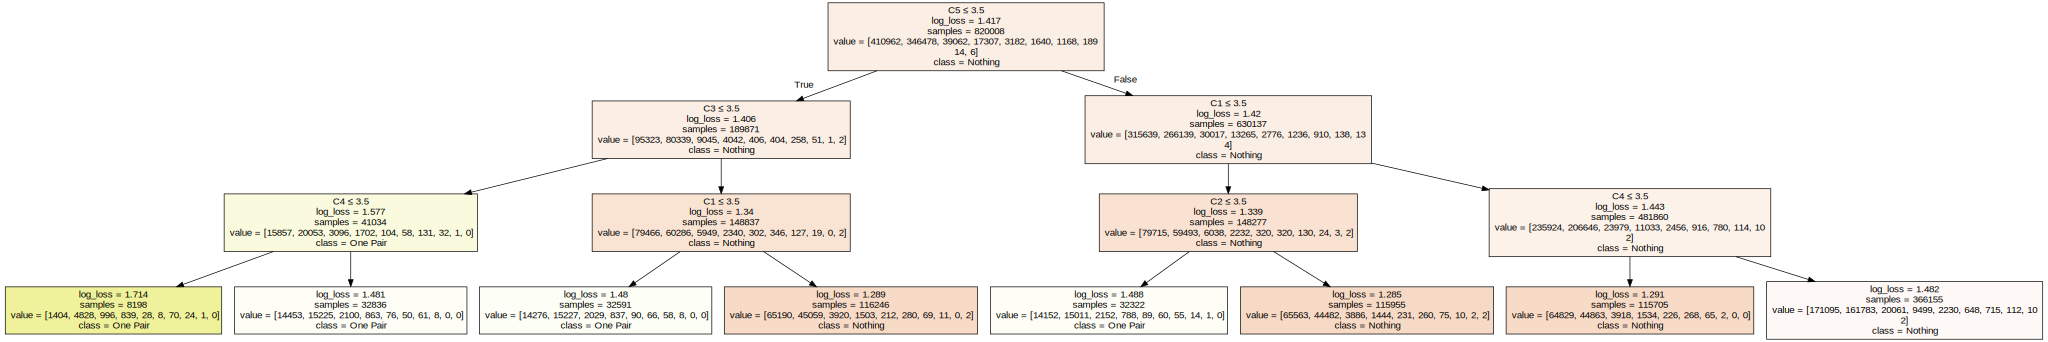

In [43]:
dot_data = tree.export_graphviz(decision_tree_3, out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Accuracy Score**

In [44]:
label_pred_3 = decision_tree_3.predict(feature_test_80)
accuracy_score(label_test_80, label_pred_3)

0.5082828460210145

### **max_depth = 4**

In [45]:
decision_tree_4 = DecisionTreeClassifier(criterion='log_loss', random_state=0, max_depth=4)
decision_tree_4.fit(feature_train_80, label_train_80.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=0)

**Tree**

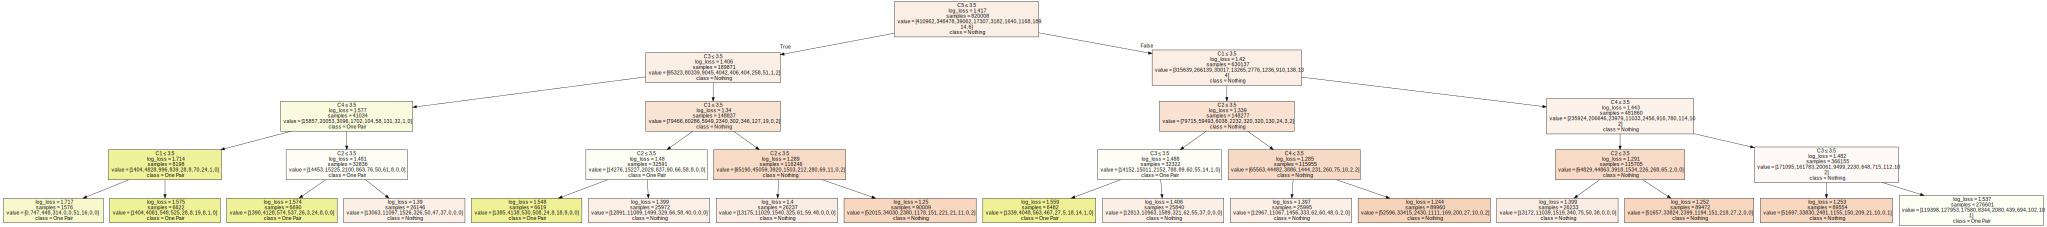

In [46]:
dot_data = tree.export_graphviz(decision_tree_4, out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Accuracy Score**

In [47]:
label_pred_4 = decision_tree_4.predict(feature_test_80)
accuracy_score(label_test_80, label_pred_4)

0.5267851045355655

### **max_depth = 5**

In [48]:
decision_tree_5 = DecisionTreeClassifier(criterion='log_loss', random_state=0, max_depth=5)
decision_tree_5.fit(feature_train_80, label_train_80.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=5, random_state=0)

**Tree**

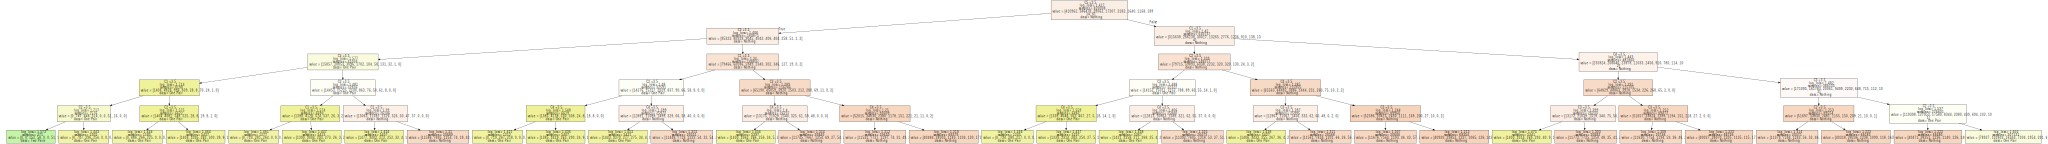

In [49]:
dot_data = tree.export_graphviz(decision_tree_5, out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Accuracy Score**

In [ ]:
label_pred_5 = decision_tree_5.predict(feature_test_80)
accuracy_score(label_test_80, label_pred_5)

0.5576287060614042

### **max_depth = 6**

In [50]:
decision_tree_6 = DecisionTreeClassifier(criterion='log_loss', random_state=0, max_depth=6)
decision_tree_6.fit(feature_train_80, label_train_80.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=0)

**Tree**

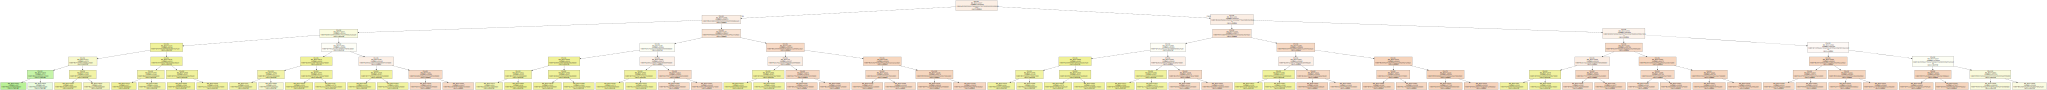

In [51]:
dot_data = tree.export_graphviz(decision_tree_6, out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Accuracy Score**

In [56]:
label_pred_6 = decision_tree_6.predict(feature_test_80)
accuracy_score(label_test_80, label_pred_6)

0.5576287060614042

### **max_depth = 7**

In [53]:
decision_tree_7 = DecisionTreeClassifier(criterion='log_loss', random_state=0, max_depth=7)
decision_tree_7.fit(feature_train_80, label_train_80.ravel())

DecisionTreeClassifier(criterion='log_loss', max_depth=7, random_state=0)

**Tree**

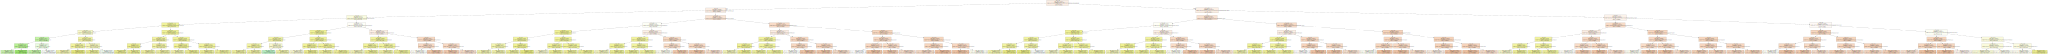

In [54]:
dot_data = tree.export_graphviz(decision_tree_7, out_file=None, 
                                feature_names=feature_names, 
                                class_names=class_names, 
                                filled=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Accuracy Score**

In [55]:
label_pred_7 = decision_tree_7.predict(feature_test_80)
accuracy_score(label_test_80, label_pred_7)

0.5576530960673555